In [ ]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'RELIANCE.NS.csv'
Reliance=pd.read_csv(FileName)

In [ ]:
Reliance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,15.859429,15.944529,15.754989,15.917452,10.509538,48051995
1,02/01/1996,15.878770,15.956133,15.677626,15.793671,10.427812,77875009
2,03/01/1996,16.052837,16.783918,15.878770,15.913584,10.506985,96602936
3,04/01/1996,15.762726,15.813012,15.553845,15.766594,10.409933,100099436
4,05/01/1996,15.704703,15.704703,15.522900,15.658285,10.338421,76935930


In [ ]:
Reliance.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6444,23/08/2021,2174.000000,2174.000000,2132.300049,2162.350098,2162.350098,4547802
6445,24/08/2021,2165.050049,2192.000000,2155.600098,2183.699951,2183.699951,5475452
6446,25/08/2021,2185.399902,2220.000000,2180.100098,2202.600098,2202.600098,6175126
6447,26/08/2021,2208.000000,2244.899902,2205.000000,2230.449951,2230.449951,8579105
6448,27/08/2021,2237.000000,2242.750000,2216.050049,2227.399902,2227.399902,4836812


In [ ]:
df1=Reliance.reset_index()['Close']

In [ ]:
df1.shape

(6449,)

In [ ]:
df1

0         15.917452
1         15.793671
2         15.913584
3         15.766594
4         15.658285
           ...     
6444    2162.350098
6445    2183.699951
6446    2202.600098
6447    2230.449951
6448    2227.399902
Name: Close, Length: 6449, dtype: float64

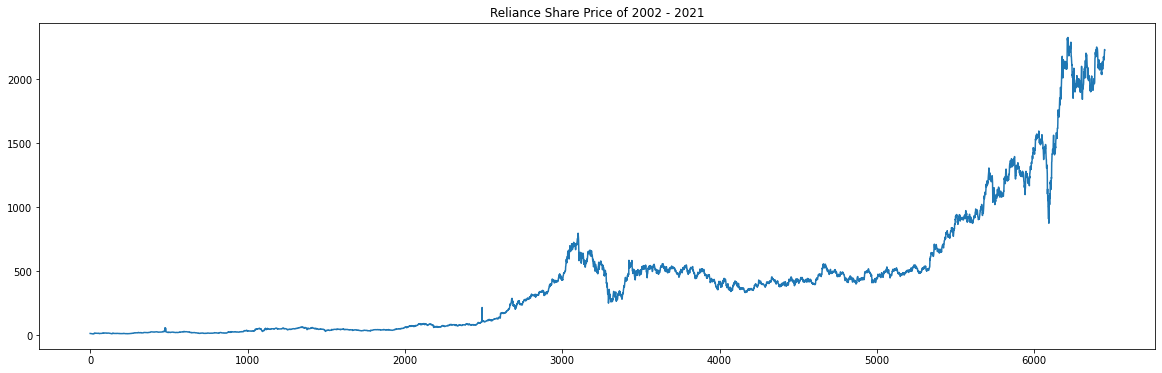

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Reliance Share Price of 2002 - 2021')
plt.plot(df1)

In [ ]:
Reliance.Date = pd.to_datetime(Reliance.Date)
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6449 entries, 0 to 6448
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6449 non-null   datetime64[ns]
 1   Open       6449 non-null   float64       
 2   High       6449 non-null   float64       
 3   Low        6449 non-null   float64       
 4   Close      6449 non-null   float64       
 5   Adj Close  6449 non-null   float64       
 6   Volume     6449 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 352.8 KB


In [ ]:
Reliance = Reliance.set_index('Date')

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     |████████████████████████████████| 306 kB 23.9 MB/s 
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=7e21e3249e91cf210850387e5e796142c1cd05bb9eda013a0d9ad0dcf18be4c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-xueccar1/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 1.1 MB/s 


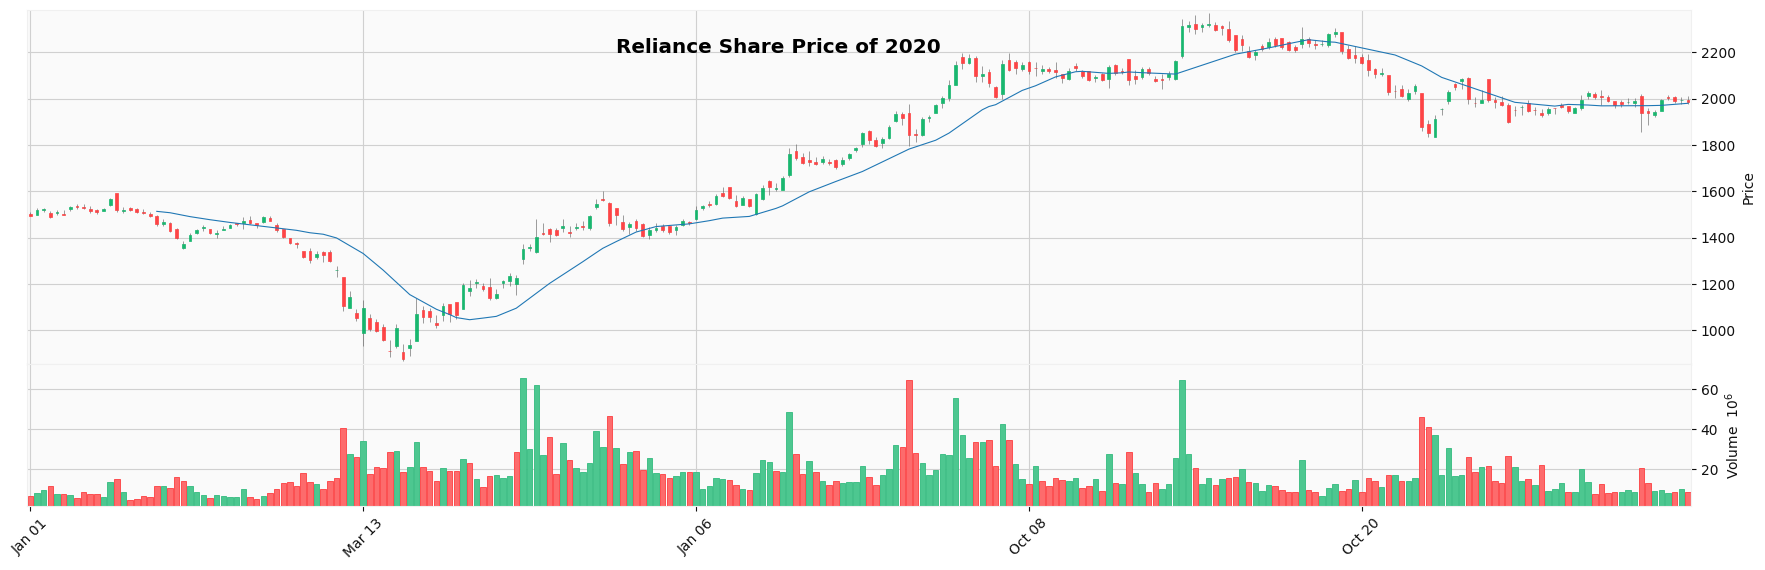

In [ ]:
import mplfinance as mpf
mpf.plot(Reliance['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Reliance Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00174118],
       [0.00168765],
       [0.0017395 ],
       ...,
       [0.94726852],
       [0.95931087],
       [0.95799202]])

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(4836, 1613)

In [ ]:
len(train_data), len(test_data)

(4836, 1613)

In [ ]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.00174118 0.00168765 0.0017395  ... 0.00334854 0.00339705 0.00322812]
 [0.00168765 0.0017395  0.00167595 ... 0.00339705 0.00322812 0.00296552]
 [0.0017395  0.00167595 0.00162911 ... 0.00322812 0.00296552 0.00293709]
 ...
 [0.21457665 0.21452311 0.21710388 ... 0.19087861 0.18933658 0.19566534]
 [0.21452311 0.21710388 0.21609726 ... 0.18933658 0.19566534 0.19378062]
 [0.21710388 0.21609726 0.21242423 ... 0.19566534 0.19378062 0.19268836]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(4735, 100)
(4735,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1512, 100)
(1512,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
74/74 [==============================] - 19s 189ms/step - loss: 9.2760e-04 - val_loss: 0.0029
Epoch 2/100
74/74 [==============================] - 13s 171ms/step - loss: 8.0367e-05 - val_loss: 0.0057
Epoch 3/100
74/74 [==============================] - 13s 175ms/step - loss: 7.1884e-05 - val_loss: 0.0064
Epoch 4/100
74/74 [==============================] - 13s 174ms/step - loss: 6.8472e-05 - val_loss: 0.0061
Epoch 5/100
74/74 [==============================] - 13s 175ms/step - loss: 6.1742e-05 - val_loss: 0.0064
Epoch 6/100
74/74 [==============================] - 13s 175ms/step - loss: 5.9859e-05 - val_loss: 0.0064
Epoch 7/100
74/74 [==============================] - 13s 176ms/step - loss: 5.3124e-05 - val_loss: 0.0046
Epoch 8/100
74/74 [==============================] - 13s 175ms/step - loss: 5.6529e-05 - val_loss: 0.0063
Epoch 9/100
74/74 [==============================] - 13s 173ms/step - loss: 4.7970e-05 - val_loss: 0.0037
Epoch 10/100
74/74 [==========================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

312.62151709514364

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1197.6751263440667

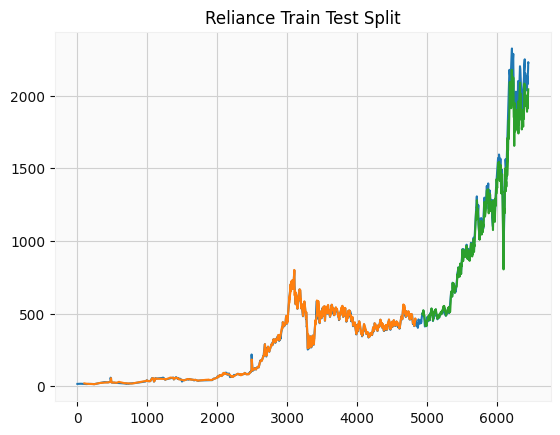

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Reliance Train Test Split')
plt.show()

In [ ]:
len(test_data)

1613

In [ ]:
x_input=test_data[1513:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8793807]
101
1 day input [0.852875   0.86089604 0.86197705 0.8519021  0.82124474 0.83017386
 0.8355789  0.83030355 0.8171585  0.81692071 0.81919083 0.81830438
 0.83278987 0.85475594 0.85849624 0.87006301 0.85728549 0.84195684
 0.82360131 0.82511472 0.82982792 0.83015222 0.82775237 0.8307576
 0.82210954 0.83255208 0.84251893 0.85445323 0.85838814 0.85335063
 0.86076635 0.85345874 0.84372968 0.84671327 0.84932927 0.90065549
 0.92897787 0.93269647 0.94668473 0.95031687 0.94203641 0.95799202
 0.95245735 0.93533416 0.93879339 0.95183028 0.96555907 0.96776436
 0.95116014 0.95291129 0.95723532 0.96225123 0.9572786  0.94845763
 0.92603751 0.90482814 0.89685033 0.89762868 0.90750901 0.90201752
 0.91546528 0.92461056 0.91362757 0.90724963 0.89970423 0.89045075
 0.89602881 0.90277422 0.89685033 0.8952721  0.90826572 0.90244992
 0.90022309 0.91185468 0.90536864 0.89289389 0.88344585 0.87581393
 0.88268914 0.87492754 0.89101289 0.89760703 0.90452548 0.91771376
 0.89816918 0.89302352 0.89773678 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

6449

Text(0.5, 1.0, 'Reliance Prediction of Next 30 Days')

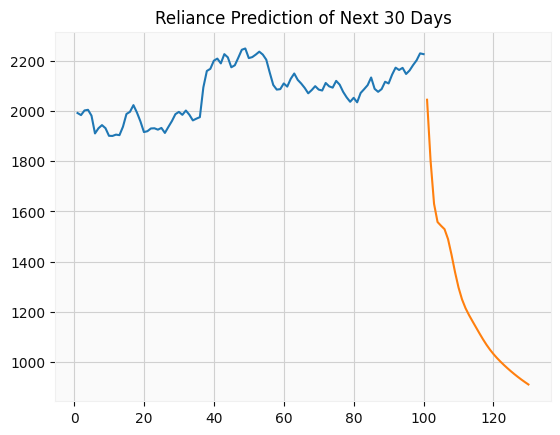

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[6349:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Reliance Prediction of Next 30 Days')

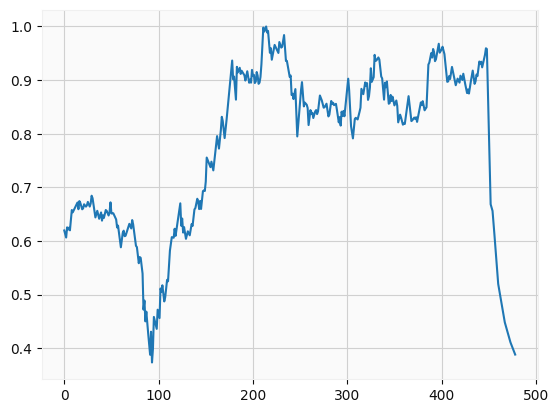

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

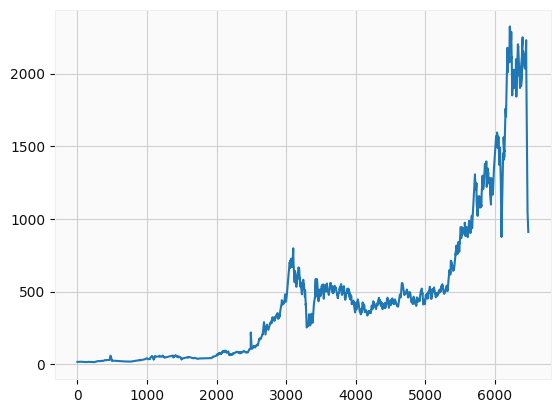

In [ ]:
plt.plot(df3)